# **House Prices Study**

## Objectives

This notebook answer business requirement 1:
* We will inspect the data related to house prices.
* We will perform a correlation study to investigate the most relevant variables correlated to the sale price.
* We will visualize these variables against the sale price, display and summarize the insights.

## Inputs

* outputs/datasets/cleaned/house_prices_records.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues'

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/cleaned/house_prices_records.csv"))
df.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.000000,No,706,GLQ,150,548,RFn,2003.0,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.000000,Gd,978,ALQ,284,460,RFn,1976.0,...,80.0,0.0,0,8,6,1262,0.0,1976,1976,181500
2,920,866.0,3.000000,Mn,486,GLQ,434,608,RFn,2001.0,...,68.0,162.0,42,5,7,920,0.0,2001,2002,223500
3,961,0.0,2.869214,No,216,ALQ,540,642,Unf,1998.0,...,60.0,0.0,35,5,7,756,0.0,1915,1970,140000
4,1145,0.0,4.000000,Av,655,GLQ,490,836,RFn,2000.0,...,84.0,350.0,84,5,8,1145,0.0,2000,2000,250000


---

# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

In [5]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Correlation Study

Check for correlations with spearman and pearson methods

In [6]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(3)

(1460, 39)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,...,BsmtFinType1_BLQ,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_None,GarageFinish_Fin,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854.0,3.0,706,150,548,2003.0,1710,8450,65.0,...,0,0,1,0,0,0,1,0,0,0
1,1262,0.0,3.0,978,284,460,1976.0,1262,9600,80.0,...,0,0,1,0,0,0,0,1,0,0
2,920,866.0,3.0,486,434,608,2001.0,1786,11250,68.0,...,0,0,1,0,0,0,1,0,0,0


In [7]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649379
TotalBsmtSF       0.602725
KitchenQual_TA   -0.581803
1stFlrSF          0.575408
YearRemodAdd      0.571159
GarageYrBlt       0.565392
KitchenQual_Gd    0.478583
Name: SalePrice, dtype: float64

In [9]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.790982
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearBuilt         0.522897
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
MasVnrArea        0.472614
Name: SalePrice, dtype: float64

We notice strong correlation between SalesPrice and 5 features with both pearson and spearman methods. 

We also discovered that the Above ground living area **GrLivArea** has a strong correlation with SalePrice. Just as our first hypotesis says.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [40]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  506.0  0.055  0.101  0.0  0.0  0.0  0.065  0.629




* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



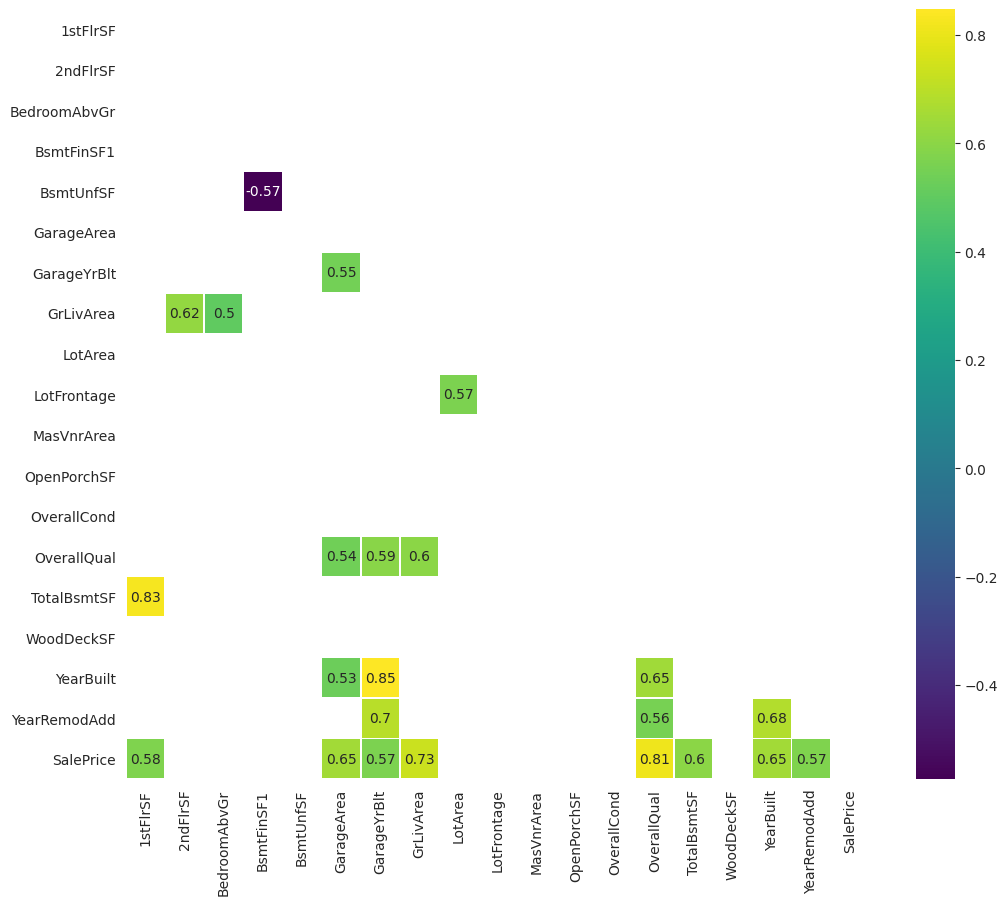



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



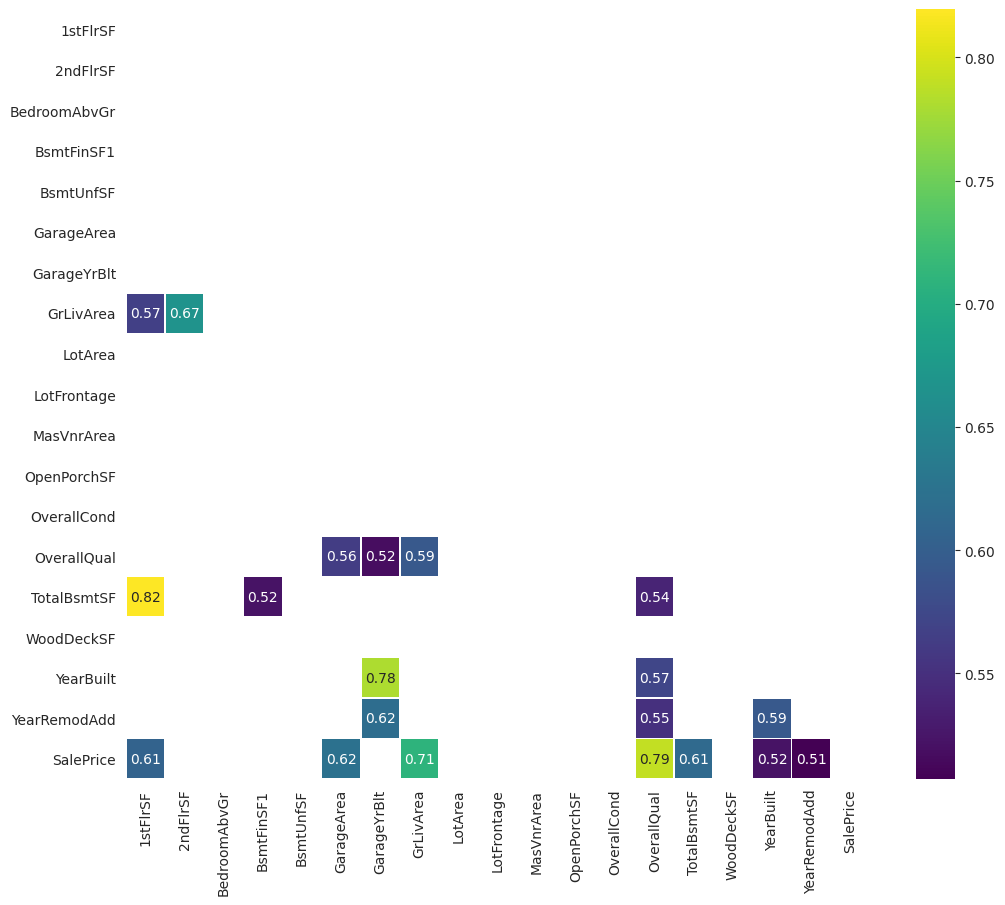



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



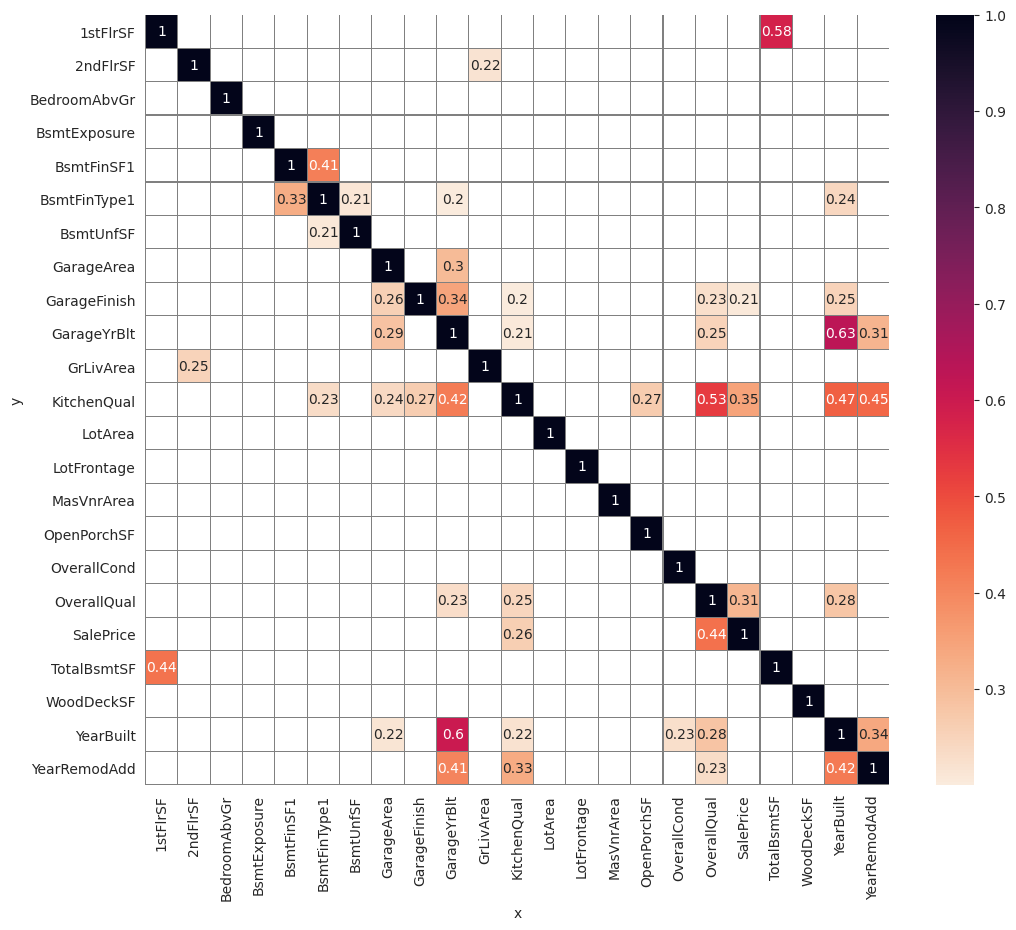

In [44]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.5, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

We can see in the heatmap that correlation between YearBuilt and OverallCond is moderate in the pearson correlation method and strong in spearman method which support hypothesis number 2.

* We check the top 5 correlation levels so we can study the features.

In [11]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

We notice its not the same 5 features thats in top with pearson/spearman. So we will keep on working with 6 features thats in the top.

We will studying the following:
* The house price is higher when the first floor area is bigger.
* The house price is higher when the above ground area is bigger.
* The house price is higher when the house have garage and depending on the size of the garage.
* The house price is higher the better overall quality there is on the house.
* The house price is higher the younger the house is.

# EDA on selected features

### Features distribution by SalePrice

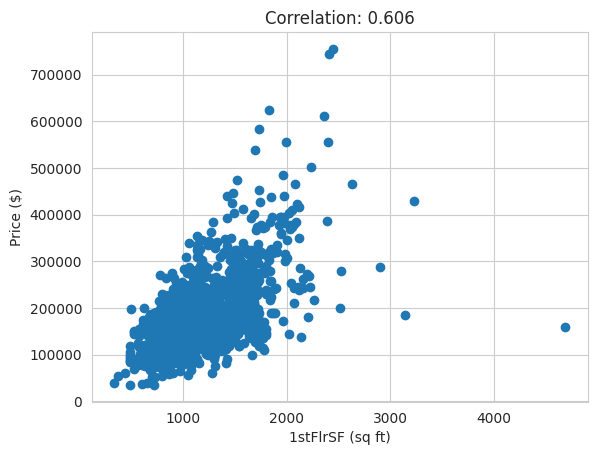

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

corr = df["SalePrice"].corr(df["1stFlrSF"])

plt.scatter(df["1stFlrSF"], df["SalePrice"])
plt.title("Correlation: {:.3f}".format(corr))
plt.xlabel("1stFlrSF (sq ft)")
plt.ylabel("Price ($)")
plt.show()

* When inspecting the scatterplot for 1stFlrSF we can see that typicaly the more sq ft the higher the price.

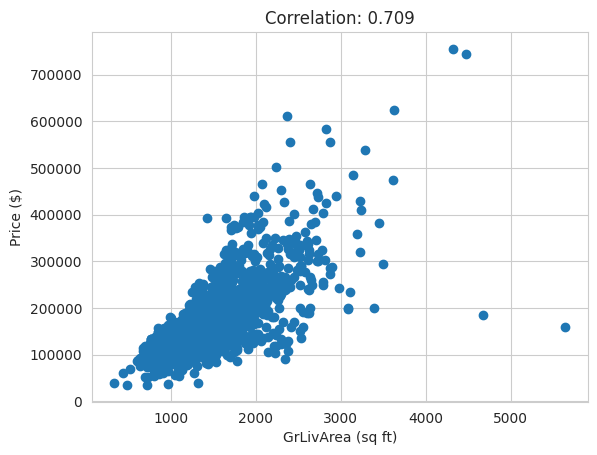

In [31]:
corr = df["SalePrice"].corr(df["GrLivArea"])

plt.scatter(df["GrLivArea"], df["SalePrice"])
plt.title("Correlation: {:.3f}".format(corr))
plt.xlabel("GrLivArea (sq ft)")
plt.ylabel("Price ($)")
plt.show()

* When inspecting the scatterplot for GrLivArea we can see that typicaly the more sq ft the higher the price.

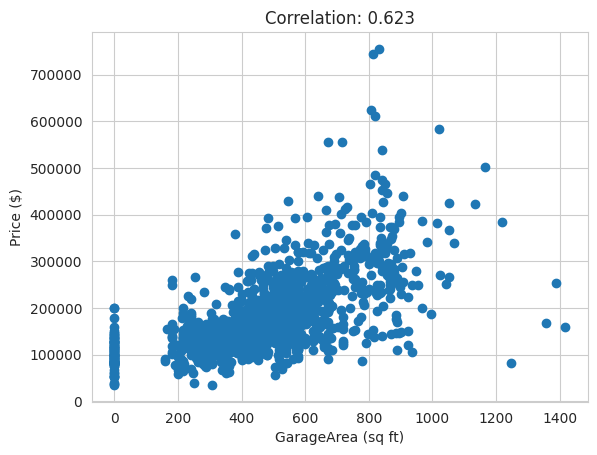

In [32]:
corr = df["SalePrice"].corr(df["GarageArea"])

plt.scatter(df["GarageArea"], df["SalePrice"])
plt.title("Correlation: {:.3f}".format(corr))
plt.xlabel("GarageArea (sq ft)")
plt.ylabel("Price ($)")
plt.show()

* When inspecting the scatterplot for GarageArea we can see that typicaly the more sq ft the higher the price even if not as clear as in above scatterplots. We also notice a lot of houses that don´t have garage due to zeros.

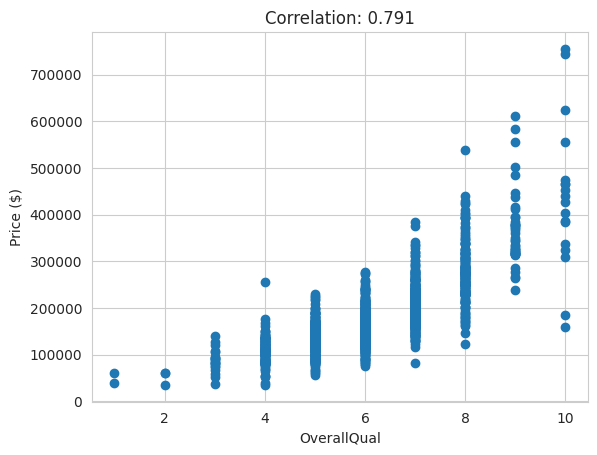

In [33]:
corr = df["SalePrice"].corr(df["OverallQual"])

plt.scatter(df["OverallQual"], df["SalePrice"])
plt.title("Correlation: {:.3f}".format(corr))
plt.xlabel("OverallQual")
plt.ylabel("Price ($)")
plt.show()

We can see in the scatterplot that when the house have higher rate for quality, the prizes are normaly higher. We also noticed big differences on the highest rate (10) with the biggest differences in price.

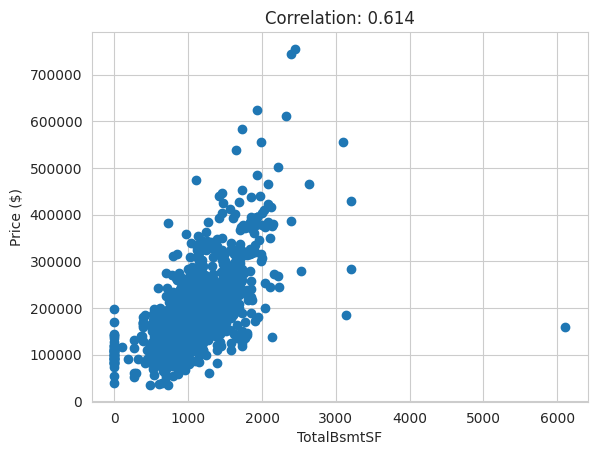

In [45]:
corr = df["SalePrice"].corr(df["TotalBsmtSF"])

plt.scatter(df["TotalBsmtSF"], df["SalePrice"])
plt.title("Correlation: {:.3f}".format(corr))
plt.xlabel("TotalBsmtSF")
plt.ylabel("Price ($)")
plt.show()

We can see that basement sq ft is correlated with higher prize and that a lot of houses don´t have basement.

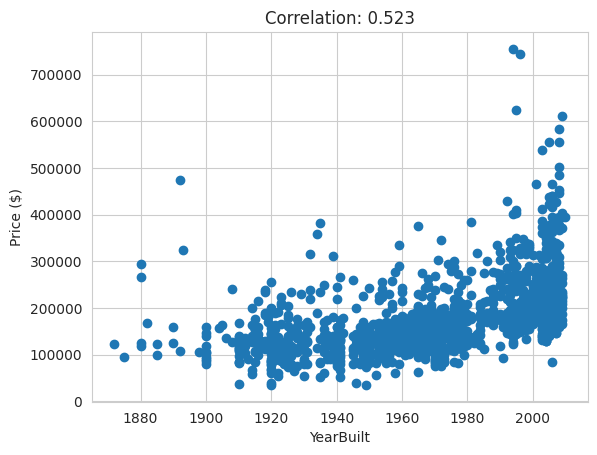

In [48]:
corr = df["SalePrice"].corr(df["YearBuilt"])

plt.scatter(df["YearBuilt"], df["SalePrice"])
plt.title("Correlation: {:.3f}".format(corr))
plt.xlabel("YearBuilt")
plt.ylabel("Price ($)")
plt.show()

Hard to see the correlation but as it may seem in the plot the highest prizes have been on the newest houses.

---

# Conclusions and Next steps

The correlations and plots interpretation converge.

* Top 6 correlated features with price is: 
 '1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'
* The house price is higher when the first floor area is bigger.
* The house price is higher when the above ground area is bigger.
* The house price is higher when the house have garage and depending on the size of the garage.
* The house price is higher the better overall quality there is on the house.
* The house price is higher the younger the house is.

* Our first hypotesis is confirmed to be true that houses with more GrLivArea has higher SalesPrice.
* Our second hypothesis is also confirmed that the younger the house is YearBuilt the better the OverallCond is of the house.